In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn scipy



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr


In [58]:
h18 = pd.read_csv('2018.csv')
h19 = pd.read_csv('2019.csv')
h17 = pd.read_csv('2017.csv')
h16 = pd.read_csv('2016.csv')
h15 = pd.read_csv('2015.csv')


In [59]:
h18.rename(columns={
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP per capita'
}, inplace=True)
h18['Year'] = 2018


In [60]:
h19.rename(columns={
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP per capita'
}, inplace=True)
h19['Year'] = 2019

In [61]:
h17.rename(columns={
    'Country': 'Country',
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'GDP per capita'
}, inplace=True)
h17['Year'] = 2017

In [62]:
h16.rename(columns={
    'Country': 'Country',
    'Happiness Score': 'Happiness Score',
    'Economy (GDP per Capita)': 'GDP per capita'
}, inplace=True)
h16['Year'] = 2016

In [63]:
h15.rename(columns={
    'Country': 'Country',
    'Happiness Score': 'Happiness Score',
    'Economy (GDP per Capita)': 'GDP per capita'
}, inplace=True)
h15['Year'] = 2015

In [64]:
h18 = h18[['Country', 'Year', 'Happiness Score', 'GDP per capita']]
h19 = h19[['Country', 'Year', 'Happiness Score', 'GDP per capita']]
h17 = h17[['Country', 'Year', 'Happiness Score', 'GDP per capita']]
h16 = h16[['Country', 'Year', 'Happiness Score', 'GDP per capita']]
h15 = h15[['Country', 'Year', 'Happiness Score', 'GDP per capita']]

In [65]:
happiness_df = pd.concat([h18, h19, h17, h16,h15], ignore_index=True)

In [66]:
gdp_raw = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_2702.csv', skiprows=4)

In [67]:
gdp_df = gdp_raw.melt(
    id_vars=['Country Name'],
    value_vars=['2015','2016', '2017', '2018', '2019'],
    var_name='Year',
    value_name='GDP per capita'
)

In [68]:
gdp_df.rename(columns={'Country Name': 'Country'}, inplace=True)
gdp_df['Year'] = gdp_df['Year'].astype(int)
gdp_df.dropna(subset=['GDP per capita'], inplace=True)

In [69]:
merged_df = pd.merge(happiness_df, gdp_df, on=['Country', 'Year'], suffixes=('_happiness', '_gdp'))

In [70]:
print(merged_df.head())

       Country  Year  Happiness Score  GDP per capita_happiness  \
0      Finland  2018            7.632                     1.305   
1       Norway  2018            7.594                     1.456   
2      Denmark  2018            7.555                     1.351   
3      Iceland  2018            7.495                     1.343   
4  Switzerland  2018            7.487                     1.420   

   GDP per capita_gdp  
0        49654.249704  
1        82792.842711  
2        61324.766505  
3        74452.189073  
4        85217.369151  


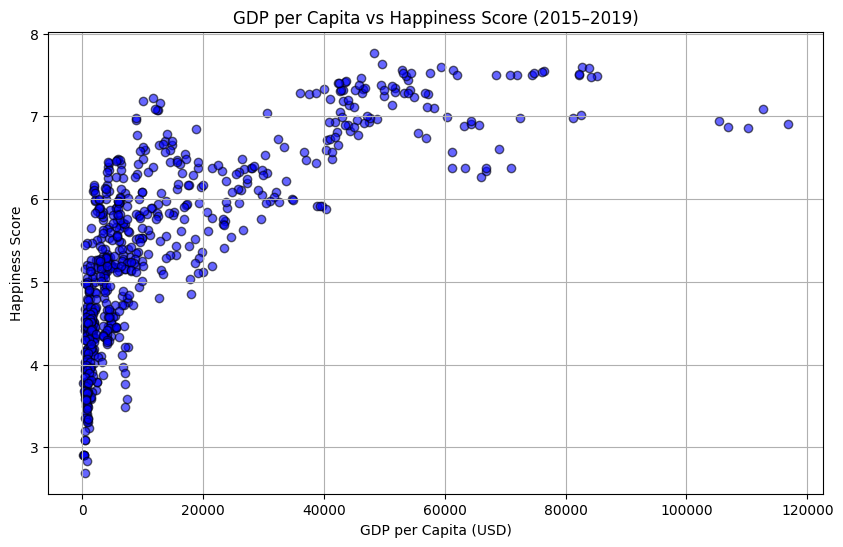

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['GDP per capita_gdp'], merged_df['Happiness Score'], alpha=0.6, c='blue', edgecolor='black')
plt.title('GDP per Capita vs Happiness Score (2015–2019)')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

In [73]:
r, p = pearsonr(merged_df['GDP per capita_gdp'], merged_df['Happiness Score'])
print('Pearson Correlation:', r, 'p-value:', p)

Pearson Correlation: 0.7307518926793722 p-value: 1.5802776634043173e-112


In [74]:
X = merged_df[['GDP per capita_gdp']]
y = merged_df['Happiness Score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [75]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [76]:
y_pred = knn.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:',rmse) 

RMSE: 0.5646217502884789


In [77]:
new_gdp = [[30000]]
new_gdp_scaled = scaler.transform(new_gdp)
predicted_happiness = knn.predict(new_gdp_scaled)

print("Predicted Happiness Score for GDP $30,000:", predicted_happiness[0])

Predicted Happiness Score for GDP $30,000: 6.127399990081789


C:\Users\Safan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
